In [ ]:
!pip install tensorflow

In [3]:
!pip install -q keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
from keras.datasets import imdb

In [6]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words= 10000 ) 

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [7]:
max([max(sequence) for sequence in train_data])

9999

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(
    optimizer='rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [16]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 23s 61ms/step - loss: 0.5900 - acc: 0.6936 - val_loss: 0.3841 - val_acc: 0.8761
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3231 - acc: 0.9028 - val_loss: 0.3015 - val_acc: 0.8919
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2274 - acc: 0.9299 - val_loss: 0.2830 - val_acc: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1745 - acc: 0.9475 - val_loss: 0.2754 - val_acc: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1434 - acc: 0.9579 - val_loss: 0.3036 - val_acc: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1151 - acc: 0.9680 - val_loss: 0.2991 - val_acc: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0971 - acc: 0.9722 - val_loss: 0.3054 - val_acc: 0.8846
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0788 - 

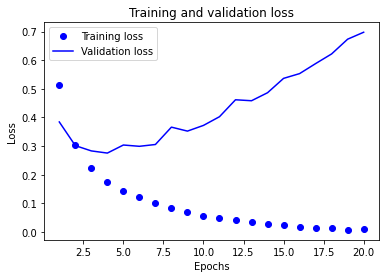

In [18]:
#len('acc')
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

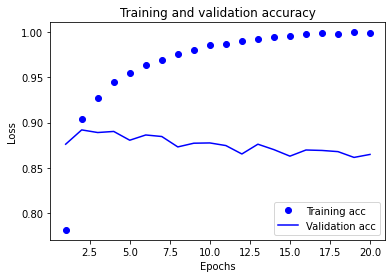

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5332 - accuracy: 0.7435
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2601 - accuracy: 0.9089
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1943 - accuracy: 0.9324
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3162 - accuracy: 0.8756


In [21]:
results

[0.316214919090271, 0.8756399750709534]

In [22]:
model.predict(x_test)

array([[0.1158312 ],
       [0.9992373 ],
       [0.7267244 ],
       ...,
       [0.09227899],
       [0.03982002],
       [0.51907015]], dtype=float32)